# **Regressão Linear Simples**

Para compreendermos relação entre as variáveis, temos, respectivamente, a covariância, o coeficiente de correlação e o coeficiente de determinação:
$$Cov(x,y)=\dfrac{\sum_{i=1}^n\,[(x_i-\bar{X})\,.\,(y_i-\bar{Y})]}{n-1}$$
$$Corr(x,y)=\dfrac{Cov(x,y)}{\sigma(x)\,.\,\sigma(y)}$$
$$CoDet.(x,y)=Corr(x,y)^2$$
Para o erro, podemos usar:
$$MSE=\dfrac{1}{N}\,\sum_{i=1}^{N}\,(f_i-y_i)^2$$
Para o ajuste dos parâmetros, podemos usar o Design Matrix (álgebra linear) que funciona bem para bases de dados com poucos atributos já que a inversão de matrizes possui um custo operacional alto. Mas também podemos fazer por Gradient Descend que possui um desempenho melhor com mais atributos.<br>
Na regressão linear múltipla, temos:
$$y=b_0+b_1\,x_1+b_2\,x_2+b_3\,x_3...+b_n\,x_n$$

In [8]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
base_plano_saude = pd.read_csv('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Regressão/plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [4]:
X_plano_saude = base_plano_saude.iloc[:,0].values
Y_plano_saude = base_plano_saude.iloc[:,1].values

In [6]:
# Correlação
print(np.corrcoef(X_plano_saude, Y_plano_saude))

[[1.         0.93091958]
 [0.93091958 1.        ]]


In [7]:
print(X_plano_saude.shape)
X_plano_saude = X_plano_saude.reshape(-1,1)
print(X_plano_saude.shape)
display(X_plano_saude)

(10,)
(10, 1)


array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [9]:
from sklearn.linear_model import LinearRegression

regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, Y_plano_saude)

LinearRegression()

In [10]:
print('b0 =',regressor_plano_saude.intercept_)
print('b1 =',regressor_plano_saude.coef_)

b0 = -558.9490909090912
b1 = [61.86787879]


In [12]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
print(previsoes)

[ 554.67272727  864.01212121 1173.35151515 1482.69090909 1792.03030303
 2101.36969697 2410.70909091 2720.04848485 3029.38787879 3338.72727273]


In [15]:
grafico = px.scatter(x=X_plano_saude.ravel(), y=Y_plano_saude)
grafico.add_scatter(x=X_plano_saude.ravel(), y=previsoes, name='Regressão')
grafico.show()

In [16]:
print(regressor_plano_saude.predict([[40]]))

[1915.76606061]


In [17]:
print('score =',regressor_plano_saude.score(X_plano_saude, Y_plano_saude))

score = 0.8666112727879174


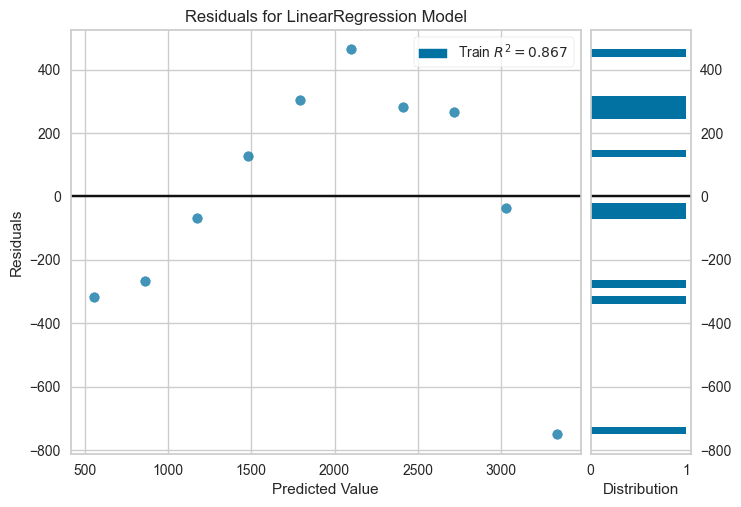

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [18]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, Y_plano_saude)
visualizador.poof()

# **Regressão Linear Múltipla**

In [22]:
base_casas = pd.read_csv('/Users/gustavomeira/Documents/Python/Estudo_ML/projects/Regressão/house_prices.csv')
display(base_casas.tail(5))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [32]:
display(base_casas.describe())
display(base_casas.info())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

None

In [26]:
# Não há valores faltantes!
display(base_casas.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

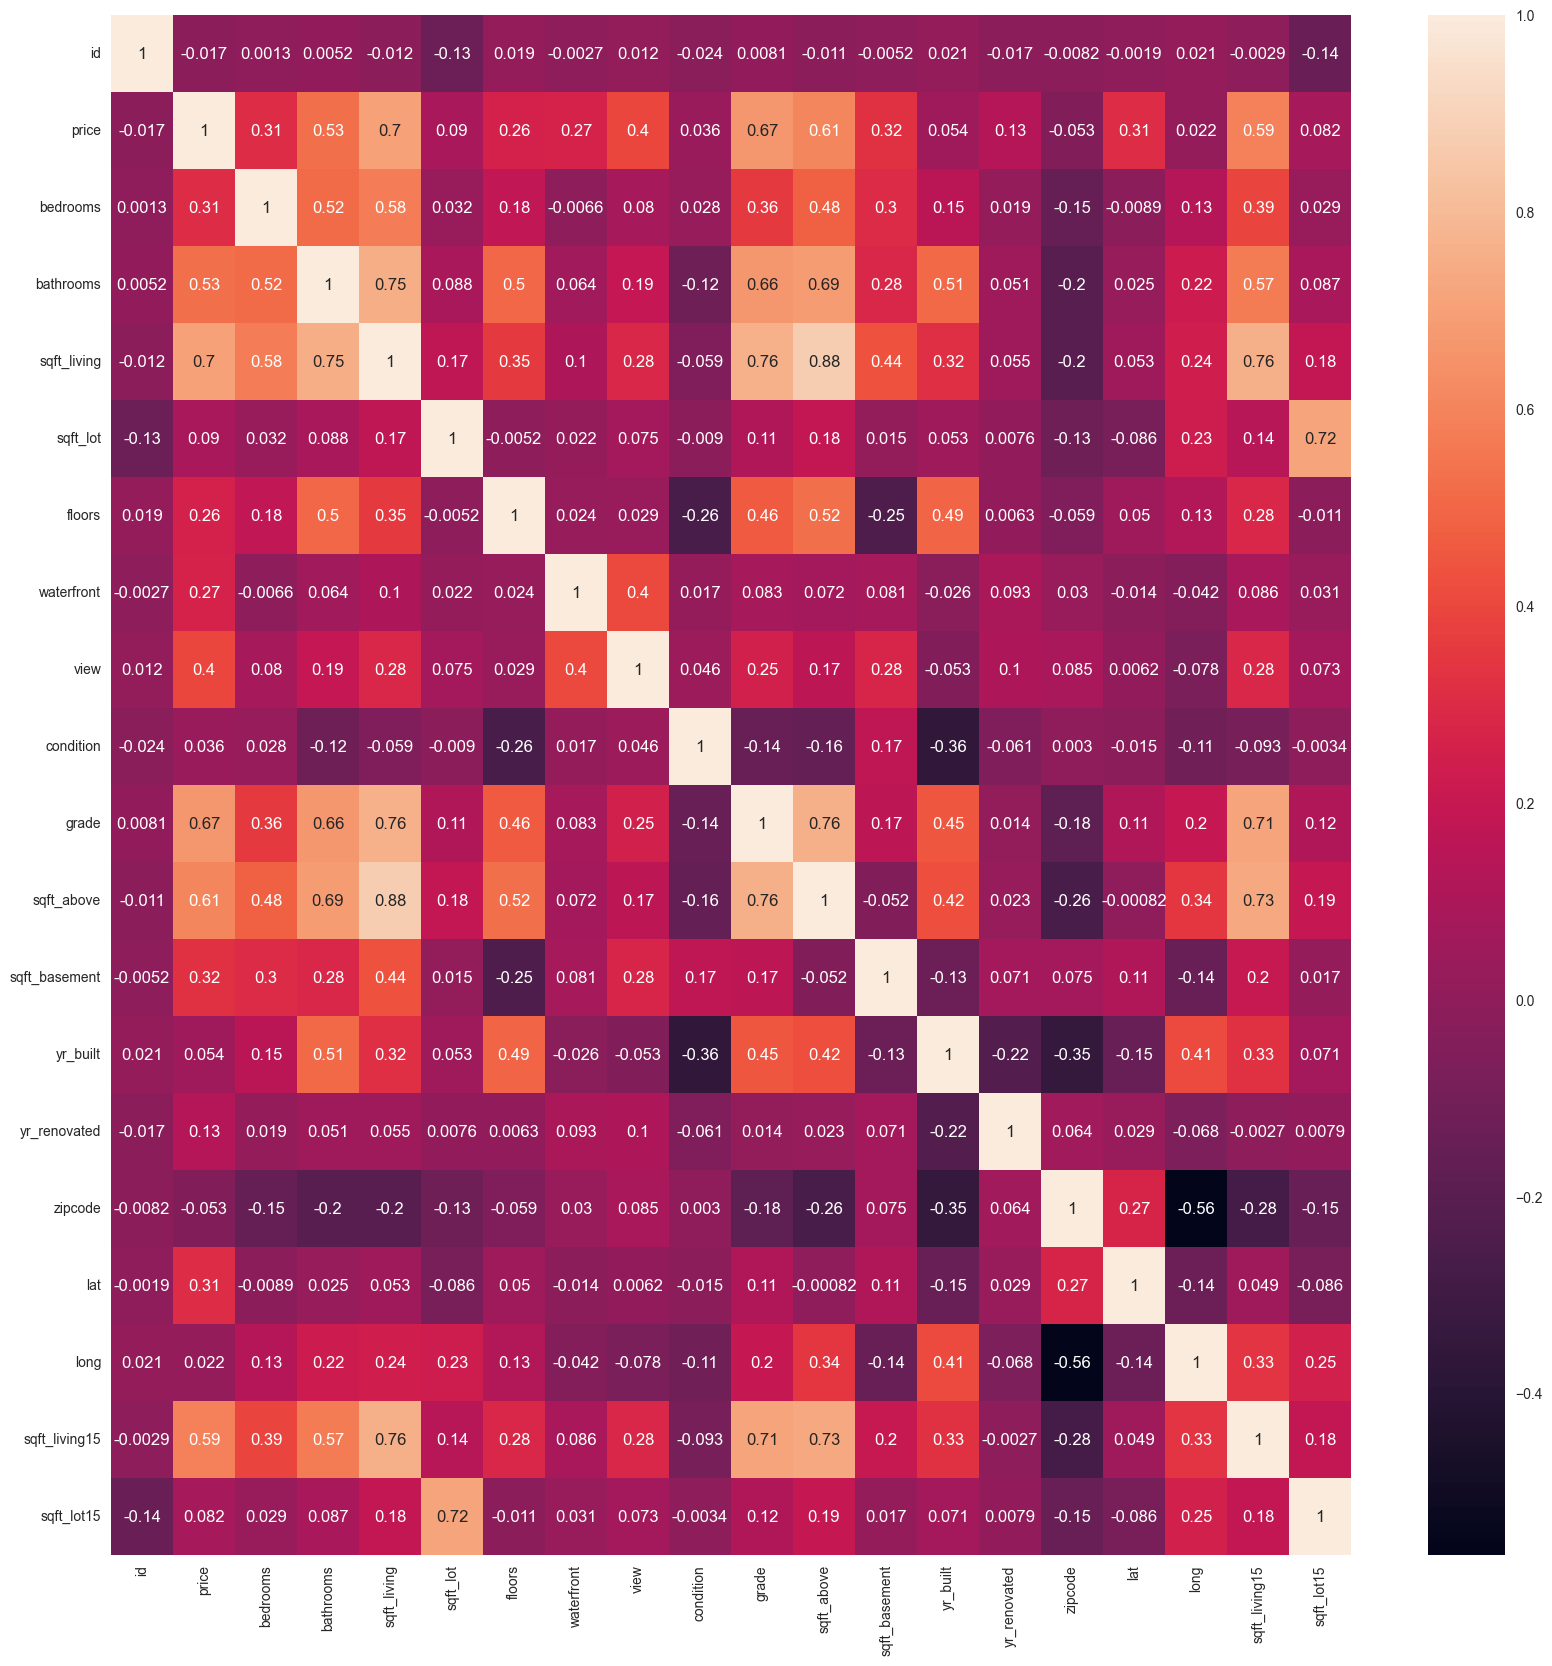

In [36]:
correlacao = base_casas.copy(deep=True)
del correlacao['date']
figura = plt.figure(figsize=(20,20))
sns.heatmap(correlacao.corr(), annot=True)

In [39]:
X_casas = base_casas.iloc[:,5:6].values

In [38]:
Y_casas = base_casas.iloc[:,2].values

In [43]:
from sklearn.model_selection import train_test_split

X_casas_treinamento, X_casas_teste, Y_casas_treinamento, Y_casas_teste = train_test_split(X_casas, Y_casas, test_size=0.3, random_state=0)

In [44]:
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, Y_casas_treinamento)
print('b0 =',regressor_simples_casas.intercept_)
print('b1 =',regressor_simples_casas.coef_)
print('score =',regressor_simples_casas.score(X_casas_treinamento, Y_casas_treinamento))
print('score =',regressor_simples_casas.score(X_casas_teste, Y_casas_teste))

b0 = -37893.59850106726
b1 = [278.32860644]
score = 0.49453356717789776
score = 0.48889929019453027


In [45]:
previsoes = regressor_simples_casas.predict(X_casas_teste)
print(previsoes)

[ 360116.30871034 1261900.99358095  362899.59477476 ...  560512.90534826
  374032.73903242  329500.16200177]


In [48]:
grafico = px.scatter(x=X_casas_treinamento.ravel(),y=Y_casas_treinamento)
x = np.linspace(start=0,stop=14000)
y = regressor_simples_casas.coef_*x + regressor_simples_casas.intercept_
grafico.add_scatter(x=x, y=y, name='Regressão')
grafico.show()

In [49]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(np.sqrt(mean_squared_error(Y_casas_teste, previsoes_teste)))
print(mean_absolute_error(Y_casas_teste, previsoes_teste))
# Ou seja, podemos haver um desvio de R$172.604,19 para cima ou para baixo nas nossas previsões

264896.23238565685
172604.1288999542


In [57]:
X_casas = base_casas.iloc[:,3:19].values
Y_casas = base_casas.iloc[:,2].values
X_casas_treinamento, X_casas_teste, Y_casas_treinamento, Y_casas_teste = train_test_split(X_casas, Y_casas, test_size=0.3, random_state=0)

In [62]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, Y_casas_treinamento)
print('b0 =',regressor_multiplo_casas.intercept_)
print("b's =",regressor_multiplo_casas.coef_)
print('score =',regressor_multiplo_casas.score(X_casas_treinamento, Y_casas_treinamento))
print('score =',regressor_multiplo_casas.score(X_casas_teste, Y_casas_teste))

b0 = 5736222.703394213
b's = [-3.08423090e+04  3.66540816e+04  1.12179159e+02  8.00604119e-03
  9.60355724e+03  5.85441638e+05  5.60621840e+04  2.54795004e+04
  1.01092121e+05  6.96565320e+01  4.25226266e+01 -2.60724691e+03
  1.40070753e+01 -5.53557431e+02  6.11778251e+05 -1.95564688e+05]
score = 0.702988808595501
score = 0.6885414149062883


In [64]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
print(mean_absolute_error(Y_casas_teste, previsoes))

123888.44377486048
